<a href="https://colab.research.google.com/github/chinmay5/guided-research/blob/master/FastText%26Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#! cat requirements.txt | xargs -n 1 pip install

In [0]:
! pip install gensim
! pip install seaborn
! pip install elasticsearch
! pip install esengine

     |████████████████████████████████| 92kB 3.5MB/s 
ERROR: s3fs 0.2.1 has requirement six>=1.12.0, but you'll have six 1.10.0 which is incompatible.
ERROR: jupyter-console 6.0.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.16 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.12.0, but you'll have six 1.10.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: six 1.12.0
    Uninstalling six-1.12.0:
      Successfully uninstalled six-1.12.0


In [0]:
from __future__ import print_function

# Handle data
import json
import operator
import collections
import re

import numpy as np
import pandas as pd

from pprint import pprint

# Model Algorithms
from gensim.models import FastText

# Modelling Helpers, see above the description
from sklearn.manifold import TSNE

from gensim.models import KeyedVectors
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [0]:
! pip install ipdb

  Stored in directory: /root/.cache/pip/wheels/59/24/91/695211bd228d40fb22dff0ce3f05ba41ab724ab771736233f3
Successfully built ipdb


In [0]:
from preprocess import *
from sub_find import *
from true_subs import *
from constants import *
from graph_evaluation import *

In [0]:
from recipe import Recipe
def load_data_from_file(filename=None, ing_file_name=None, local=False, save=True):
    return load_data(file_name=filename, ing_file_name=ing_file_name, local=local, save=save)
    

In [0]:
recipes = load_data_from_file("100ksample", ing_file_name = "dbpedia_ingredients.txt",local=True, save=False )
clean_recipes = [x.proccessed_ing_list for x in recipes]
recipes = load_data_from_file("100ksample2", "dbpedia_ingredients.txt")
sample100k2 = [x.proccessed_ing_list for x in recipes]
clean_recipes.extend(sample100k2) 
type(clean_recipes)

list

In [0]:
num_features = 300    # Word vector dimensionality                      
min_word_count = 3                        
num_workers = 4       # Number of CPUs
context = 8          # Context window size; 
                      # let's use avg recipte size                                                                                  
downsampling = 1e-3   
                    # higher-frequency words are randomly downsampled

# Initialize and train the model 
model = FastText(workers=num_workers, \
            size=num_features,window=context, min_count = min_word_count)
model.build_vocab(clean_recipes)
model.train(sentences = clean_recipes, total_examples = model.corpus_count, epochs=model.iter)
model.save("ingredient2vec_fattext.model")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).



In [0]:
loaded_model = FastText.load('ingredient2vec_fattext.model')
print(loaded_model)

FastText(vocab=1084, size=300, alpha=0.025)


In [0]:
loaded_model.similarity('ground beef', 'turkish delight')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



0.4511402

In [0]:
print('carrot' in loaded_model.wv.vocab)
print('carrots' in loaded_model.wv.vocab)
#print(model['carrot'])
print(loaded_model['carrots']) 

True
False
[-9.39353369e-03  9.18138087e-01 -2.79668593e+00  1.33186090e+00
 -1.55827761e-01 -2.04958320e+00  7.95783222e-01  2.32752010e-01
 -7.88725972e-01 -5.27990401e-01  5.08595705e-01  2.15959866e-02
 -7.27984488e-01  1.01727772e+00 -2.61461049e-01 -3.86988372e-01
  8.74699876e-02 -5.81255376e-01 -1.40028071e+00 -9.68301654e-01
  2.34315041e-02  6.37548566e-01 -1.51760364e+00  4.08428252e-01
 -2.45703906e-01  3.49886298e-01 -6.09179735e-02  5.02875090e-01
 -7.55459905e-01  1.79282224e+00  6.81866705e-01  5.11711538e-01
  8.08160067e-01 -1.02525795e+00 -5.02863705e-01 -2.14565247e-01
 -1.29647672e-01  2.01186061e+00 -7.18281925e-01 -6.48876607e-01
  1.13266826e+00 -6.01675846e-02 -4.91898030e-01 -4.38933700e-01
 -1.14594615e+00  3.22222799e-01  2.57715225e-01 -1.12248218e+00
  4.17036742e-01 -3.55082214e-01  1.60466790e+00 -6.97662115e-01
 -4.83005553e-01 -6.80904210e-01  3.03420484e-01  4.00049984e-01
  1.48506641e-01  1.44038484e-01 -3.59892279e-01  1.09478414e+00
 -2.19853535e-

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [0]:
loaded_model.similarity("carrot", "carrots")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



0.9903813

In [0]:
loaded_model.most_similar(u'heavy cream')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('cream', 0.9130944013595581),
 ('chantilly cream', 0.864874005317688),
 ('pastry cream', 0.8464686870574951),
 ('clotted cream', 0.8244143724441528),
 ('butter cream', 0.7394663095474243),
 ('whipped cream', 0.6226131916046143),
 ('cream puffs', 0.615715503692627),
 ('jam', 0.5689328908920288),
 ('ice cream', 0.5629777908325195),
 ('whole milk', 0.5254900455474854)]

In [0]:
from sklearn.manifold import TSNE

In [0]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f') # Since 300 dimensional
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



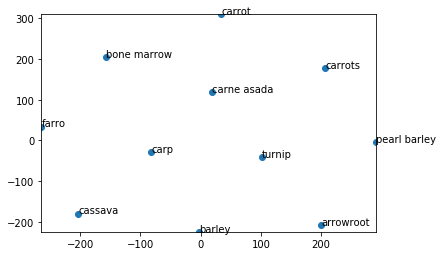

In [0]:
display_closestwords_tsnescatterplot(loaded_model, u'carrots')

In [0]:
%matplotlib inline

In [0]:
def tsne_plot(model, plt_name='word_embeddings_fast_text.png'):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig(plt_name, dpi = 300)
    plt.show()
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



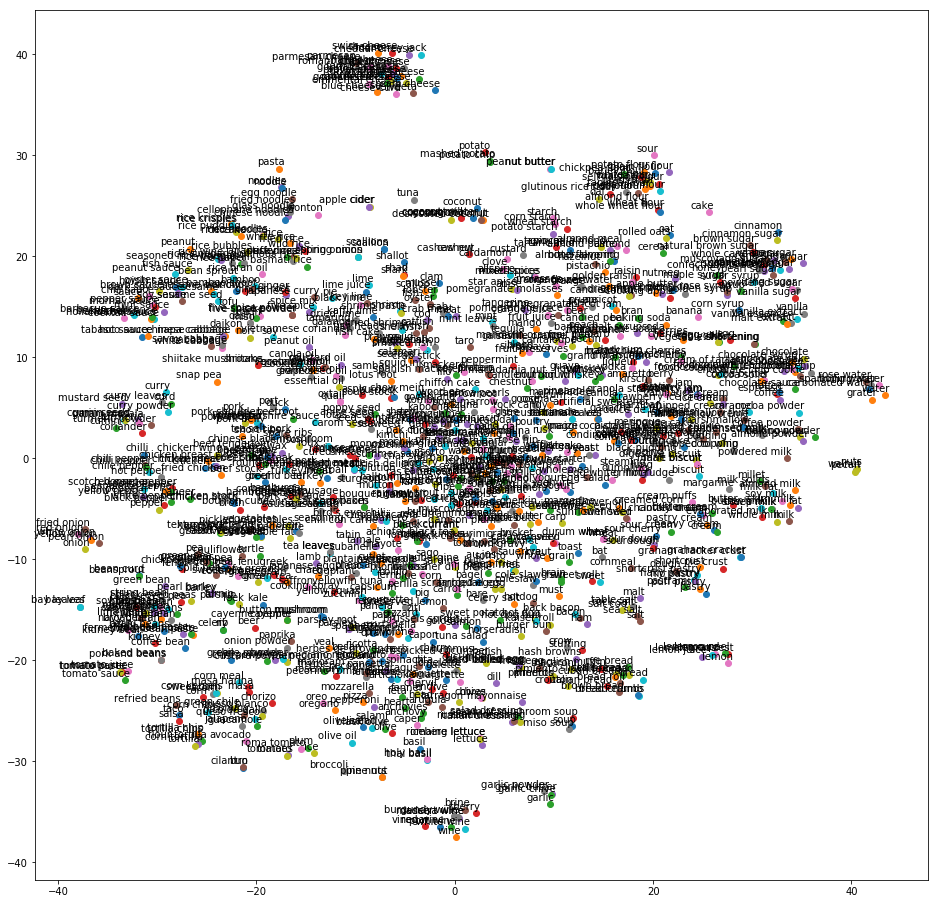

In [0]:
tsne_plot(loaded_model)

## Trying same for Word2Vec

In [0]:
from gensim.models import Word2Vec

In [0]:
num_features = 300    # Word vector dimensionality                      
min_word_count = 3                        
num_workers = 4       # Number of CPUs
context = 8          # Context window size; 
                      # let's use avg recipte size                                                                                  
downsampling = 1e-3   
                    # higher-frequency words are randomly downsampled

# Initialize and train the model 
model = Word2Vec(workers=num_workers, \
            size=num_features,window=context, min_count = min_word_count)
model.build_vocab(clean_recipes)
model.train(sentences = clean_recipes, total_examples = model.corpus_count, epochs=model.iter)
model.save("ingredient2vec_word2vec.model")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).



In [0]:
loaded_word2vec = FastText.load('ingredient2vec_word2vec.model')
print(loaded_word2vec)

Word2Vec(vocab=1084, size=300, alpha=0.025)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



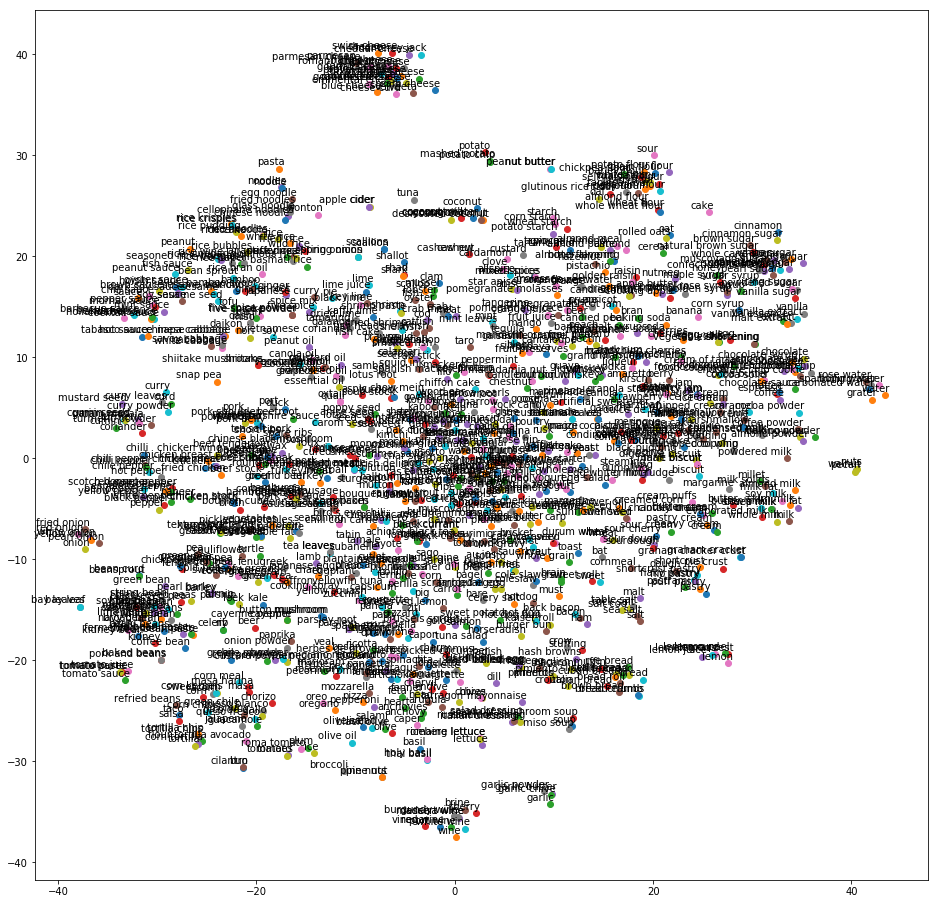

In [0]:
tsne_plot(loaded_model, plt_name='word_embeddings_word2vec.png')

## Now trying the same ideas on the GloVe model. Technically it should work equally well

In [0]:
!pip install glove_python

     |████████████████████████████████| 266kB 4.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


### Using this portion in order to define the PyTorch GloVe model

In [0]:
import numpy as np
import scipy.io
from scipy.sparse import save_npz, load_npz, coo_matrix
import multiprocessing as mp
import torch
import torch.nn as nn
from torch.nn.init import xavier_normal
from torch.autograd import Variable

class GloVeClass(nn.Module):
    """
        This class provide GloVe model with some beneficial methods to utilize it.
    """
    def __init__(self, TOKENIZED_CORPUS, UNIQUE_WORD_LIST, EMBED_SIZE, CONTEXT_SIZE, X_MAX, ALPHA, TOTAL_PROCESS_NUM):
        """
            This method initialize GloVeClass with given parameters.
        
            Args:
                TOKENIZED_CORPUS(list) : list of all words in a corpus
                UNIQUE_WORD_LIST(ndarray) : list of all unique word
                EMBED_SIZE : the size of vector 
                CONTEXT_SIZE : context window size
                X_MAX : maximun x size
                ALPHA : ALPHA
                TOTAL_PROCESS_NUM : TOTAL_PROCESS_NUM
        """
        super(GloVeClass, self).__init__()

        print("[Initialization Start]")
        self.TOKENIZED_CORPUS = TOKENIZED_CORPUS
        self.UNIQUE_WORD_LIST = UNIQUE_WORD_LIST
        self.CONTEXT_SIZE = CONTEXT_SIZE
        self.EMBED_SIZE = EMBED_SIZE
        self.X_MAX = X_MAX
        self.ALPHA = ALPHA
        self.word_to_index = {word: index for index, word in enumerate(self.UNIQUE_WORD_LIST)}
        self.index_to_word = {index: word for index, word in enumerate(self.UNIQUE_WORD_LIST)}
        self.TOKENIZED_CORPUS_SIZE = len(self.TOKENIZED_CORPUS)
        self.UNIQUE_WORD_SIZE = len(self.UNIQUE_WORD_LIST)       

        self.in_embed = nn.Embedding(self.UNIQUE_WORD_SIZE, self.EMBED_SIZE)
        self.in_embed.weight = xavier_normal(self.in_embed.weight)
        self.in_bias = nn.Embedding(self.UNIQUE_WORD_SIZE, 1)
        self.in_bias.weight = xavier_normal(self.in_bias.weight)
        self.out_embed = nn.Embedding(self.UNIQUE_WORD_SIZE, self.EMBED_SIZE)
        self.out_embed.weight = xavier_normal(self.out_embed.weight)
        self.out_bias = nn.Embedding(self.UNIQUE_WORD_SIZE, 1)
        self.out_bias.weight = xavier_normal(self.out_bias.weight)
        
        self.word_embeddings_array = None
        self.word_u_candidate = np.arange(self.UNIQUE_WORD_SIZE)
        self.word_v_candidate = np.arange(self.UNIQUE_WORD_SIZE)
        
        self.total_process_num = TOTAL_PROCESS_NUM
        if TOTAL_PROCESS_NUM:
            print("Build co-occurence matrix with multiprocess")
            print("TOTAL_PROCESS_NUM : ", TOTAL_PROCESS_NUM)
            queue = mp.Queue()
            ps = list()
            for i in range(self.total_process_num):
                ps.append(mp.Process(target=self.build_sub_co_occurence_matrix, args=(queue, i)))
            for p in ps:
                p.start()
            
            for i in range(self.total_process_num):
                if i:
                    col += queue.get()   # キューに値が無い場合は、値が入るまで待機になる
                else:
                    col = queue.get()
            for p in ps:
                p.terminate()
            col = np.array(col, dtype = np.int64)
            self.co_occurence_matrix = coo_matrix(
                (np.ones(col.size, dtype = np.int64), (np.zeros(col.size, dtype = np.int64), col)), 
                shape=(1, int((self.UNIQUE_WORD_SIZE * (self.UNIQUE_WORD_SIZE + 1)) / 2)),
                dtype = np.int64
            )
            print("Done")                             
            tries = 10
            while tries:
                try:
                    print("SAVE co_occurence_matrix")
                    # scipy.io.mmwrite('model/co_occurence_matrix.mtx', self.co_occurence_matrix)
                    save_npz('model/co_occurence_matrix.npz', self.co_occurence_matrix)
                    print("Done")
                except IOError as e:
                    print("IOError happened")
                    error = e
                    tries -= 1
                else:
                    break
            if not tries:
                print("Fail to saving matrix due to IOError")
                raise error
        else:
            print("Load co-occurence matrix")
            # self.co_occurence_matrix = scipy.io.mmread('model/co_occurence_matrix.mtx')
            self.co_occurence_matrix = load_npz('model/co_occurence_matrix.npz')
            print("Done")
        self.co_occurence_matrix = self.co_occurence_matrix.todense()
        print("[Initialization Done]")
        
    def build_sub_co_occurence_matrix(self, queue, process_num):
        col = list()
        
        ini = int(self.TOKENIZED_CORPUS_SIZE * process_num / self.total_process_num)
        fin = int(self.TOKENIZED_CORPUS_SIZE * (process_num + 1) / self.total_process_num)
        for i in range(ini, fin):
            index = self.word_to_index[self.TOKENIZED_CORPUS[i]]
            for j in range(1, self.CONTEXT_SIZE + 1):
                if i - j > 0:
                    left_index = self.word_to_index[self.TOKENIZED_CORPUS[i - j]]
                    col.append(self.convert_pairs_to_index(left_index, index))
                if i + j < self.TOKENIZED_CORPUS_SIZE:
                    right_index = self.word_to_index[self.TOKENIZED_CORPUS[i + j]]
                    col.append(self.convert_pairs_to_index(right_index, index))
        queue.put(col)
    
    def weight_func(self, x):
        return 1 if x > self.X_MAX else (x / self.X_MAX) ** self.ALPHA

    def convert_pairs_to_index(self, word_u_index, word_v_index):
        u = min(word_u_index, word_v_index)
        v = max(word_u_index, word_v_index)
        # return int((UNIQUE_WORD_SIZE + (UNIQUE_WORD_SIZE - (u - 1))) * u / 2 + (v - u))
        return int((2 * self.UNIQUE_WORD_SIZE - u + 1) * u / 2 + v - u)

    def next_batch(self, batch_size):
        word_u = np.random.choice(self.word_u_candidate, size=batch_size)
        word_v = np.random.choice(self.word_v_candidate, size=batch_size)
        # https://discuss.pytorch.org/t/operation-between-tensor-and-variable/1286/4
        #word_u = np.random.randint(self.UNIQUE_WORD_SIZE, size=batch_size)
        #word_v = np.random.randint(self.UNIQUE_WORD_SIZE, size=batch_size)
        # + 1 -> to prevent having log(0)
        words_co_occurences = np.array(
            [self.co_occurence_matrix[0, self.convert_pairs_to_index(word_u[i], word_v[i])] + 1 for i in range(batch_size)]
        )
        words_weights = np.array([self.weight_func(var) for var in words_co_occurences])
        return Variable(torch.from_numpy(word_u).cuda()), Variable(torch.from_numpy(word_v).cuda()), Variable(torch.from_numpy(words_co_occurences).cuda()).float(), Variable(torch.from_numpy(words_weights).cuda()).float()

    def forward(self, word_u, word_v):
        word_u_embed = self.in_embed(word_u)
        word_u_bias = self.in_bias(word_u)
        word_v_embed = self.out_embed(word_v)
        word_v_bias = self.out_bias(word_v)
        return ((word_u_embed * word_v_embed).sum(1) + word_u_bias + word_v_bias).squeeze(1)
    
    def embedding(self):
        self.word_embeddings_array = self.in_embed.weight.data.cpu().numpy() + self.out_embed.weight.data.cpu().numpy()
        return self.word_embeddings_array

In [0]:
from glove import Corpus, Glove
# creating a corpus object
corpus = Corpus() 
#training the corpus to generate the co occurence matrix which is used in GloVe
corpus.fit(clean_recipes, window=context,)

In [0]:
workers=num_workers, \
            size=num_features,window=context, min_count = min_word_count